# Housing Data: King County, WA 

### *Modeling data to House Price*

###### Authors: Svitlana Glibova & [Jamie Dowat](mailto:jamie_dowat44@yahoo.com)

![seattleskyline](img/seattleskyline.png)

## Business Understanding

#### Real Estate and Data Science

As the world becomes more technologically savvy, highly competitive markets (such as real estate) are reaching for more and more rigorous analytics to help them stay ahead. This desire for more accurate predictive and inferential modeling is so great, apparently, that they are offering formal Data Science [bootcamps](https://www.propertyquants.com/training/?utm_source=google&utm_medium=cpc&utm_campaign=P-Real%20Estate%20Data&utm_term=%2Breal%20%2Bestate%20%2Bdata&utm_content=&gclid=Cj0KCQiAvbiBBhD-ARIsAGM48bzsFBf1tarC8f6xwnH9T-HkmdpI_qLjozgbvPXSHuCIemsH85A9eSoaAooVEALw_wcB) that specialize in measuring real estate trends!

Companies like [Opendoor](https://www.youtube.com/watch?v=dR5N8cMkIGQ) and Zillow are also taking the industry in a different direction, by working to automate the home-buying and selling process, which requires proper analysis of market trends to determine a houses estimated market value.

#### Defining the Stakeholder: **Residential Realtors**

Though there are a number of stakeholders in the industry, from investors to house flippers to renters, we decided to gear our analysis towards maximizing profit for **residential realtors**, whose paycheck directly depends on the price of the house they sell.

In other words, this analysis seeks to answer the question:
###### How can you best assist your client in setting or offering a home price?
###### (Is a given client undercharging or overpaying for a home?)

Through a more comprehensive knowledge of house price trends, King County realtors can (hopefully) see more success when helping to set house prices for their clients.


### "A COVID Caveat"

It is important to note that our data only consists of homes that were sold between 2014-2015. Considering the current economic situation, we cannot say that our resulting models account for these current trends. For a more detailed account of how house prices have been changing in 2020-2021, take a look at our **presentation.pdf** file.

## Data Exploration 

This data consists of information for **21,597 homes** within King County, WA. 

The data was sourced from the [King County website](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

Let's take a look:

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('src/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

###### Let's take care of our NaN values

In [5]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1008.0        1
792.0         1
666.0         1
65.0          1
2610.0        1
Name: sqft_basement, Length: 304, dtype: int64

For the sake of analysis, we didn't find any use with the **yr_renovated**, and **view** columns. We'll drop that along with **id**. 

In [7]:
from src import boring_code as bc
nan_columns = ['waterfront', 'sqft_basement']
cols_to_drop = ['view', 'yr_renovated', 'id']

In [8]:
bc.cleaning(df=data, 
         column_names=nan_columns, 
         drop=cols_to_drop, 
         date_col='date', 
         date_suffix=['_sold', '_sold'], 
         date_split='/')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2,2015


In [9]:
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

*33 bedrooms?* When we plugged this house's parcel id (2402100895) into the [King County House Finder](https://info.kingcounty.gov/assessor/eMap/default.aspx), we concluded it must be an input error. We decided to replace this bedroom value with **np.nan**:

In [10]:
data['bedrooms'].iloc[15856] = np.nan

##### Adding New Features
Here's the list of the new features we added to the data frame:

* **price_per_sqft**
* **yard_size** = sqft_lot - sqft_above - sqft_basement
* **in_city** - Y or N, if the house is located in a Seattle zipcode
* **unincorporated** - if the house is located in an incorporated area (for map of unincorporated/inc areas in KC, see Sources at the bottom of this notebook)
* **zip_psqft** - the average price per sqft for the given house's zipcode
* **price_per_lot_sqft**
* **location_cost** - categorical that identifies the zip-per-sqft range the house's zipcode has
* **decade_built**
* **40yr_section** - if the house was built between 1900-1940, 1940-1980, or 1980-2020
* **waterfront** - change 0s and 1s to Y or N
* **season sold**

We wanted to see if our model would be improved by grouping our categorical variables in different ways.

In [11]:
bc.new_features(df=data, 
                new_column_names=['price_per_sqft', 'yard_size', 'in_city', 'unincorporated',
                                 'zip_psqft', 'price_per_lot_sqft', 'location_cost', 'decade_built',
                                 '40yr_section', 'waterfront', 'season_sold'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,price_per_sqft,yard_size,in_city,unincorporated,zip_psqft,location_cost,price_per_lot_sqft,decade_built,40yr_section,season_sold
0,221900.0,3.0,1.00,1180,5650,1.0,NaN,3,7,1180,...,188.050847,4470.0,Y,N,189.172528,zpsft100_200,39.274336,1950_1960,1900_1940,fall
1,538000.0,3.0,2.25,2570,7242,2.0,N,3,7,2170,...,209.338521,4672.0,Y,N,282.680191,zpsft200_300,74.288870,1950_1960,1900_1940,winter
2,180000.0,2.0,1.00,770,10000,1.0,N,3,6,770,...,233.766234,9230.0,N,N,225.145368,zpsft200_300,18.000000,1930_1940,1900_1940,winter
3,604000.0,4.0,3.00,1960,5000,1.0,N,5,7,1050,...,308.163265,3040.0,Y,N,337.245108,zpsft300_400,120.800000,1960_1970,1900_1940,winter
4,510000.0,3.0,2.00,1680,8080,1.0,N,3,8,1680,...,303.571429,6400.0,N,N,265.686627,zpsft200_300,63.118812,1980_1990,1900_1940,winter


### Looking at Correlations

In [12]:
# dropping these columns temporarily for our visualizations... don't worry, we'll we using them later ;)
cols = data.drop(labels=['zipcode', 'lat', 'long'], axis=1).columns
corr_df = data[cols].corr()

In [13]:
corr_table = bc.corr_table(corr_df)
corr_table.head()

,cc
pairs,
"(yard_size, sqft_lot)",0.999711
"(year_sold, month_sold)",0.971193
"(sqft_living15, sqft_living)",0.943227
"(sqft_lot, sqft_lot15)",0.943193
"(yard_size, sqft_lot15)",0.942230


We'll bring back this table again when we start dealing with multicollinearity. For now, let's find the variables that have the highest correlation with **price**:

In [14]:
corr_df['price'][corr_df['price'] > .5].sort_values(ascending=False)

price             1.000000
sqft_living       0.701917
grade             0.667951
sqft_above        0.605368
sqft_living15     0.585241
price_per_sqft    0.556056
zip_psqft         0.532667
bathrooms         0.525906
Name: price, dtype: float64

Let's explore these higher correlated variables (and some others) with some ***visualizations***...

### Visualizing the Data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

###### First, let's get a sense of how these house prices are distributed:

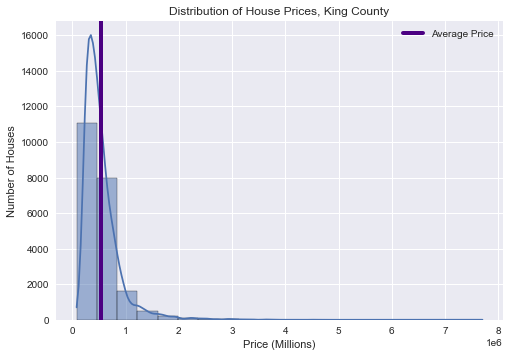

In [16]:
bc.price_distribution(data)

Look's like we have a significant right **(positive) skew**.

In [17]:
# Average Price
data.price.mean()

540296.5735055795

###### Let's see how price differs by **House Grade**. Houses in King County are graded by this criteria:
* 1-3:  Falls short of minimum building standards. Normally cabin or inferior structure.
* 4: Generally older, low quality construction. Does not meet code.
* 5: Low construction costs and workmanship. Small, simple design.
* 6: Lowest grade currently meeting building code. Low quality materials and simple designs.
* 7: Average grade of construction and design. Commonly seen in plats and older sub-divisions.
* 8: Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
* 9: Better architectural design with extra interior and exterior design and quality.
* 10: Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
* 11: Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
* 12: Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
* 13: Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.


<AxesSubplot:title={'center':'Comparing House Grade to Price'}, xlabel='Grade - King County Grading System (See Appendix)', ylabel='Price (Millions)'>

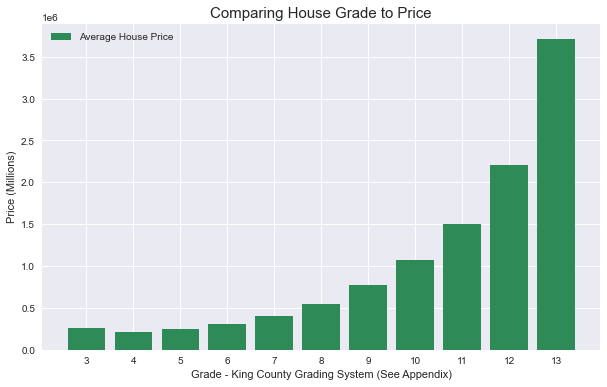

In [18]:
bc.price_by_grade(data)

There seems to be a significant positive correlation here, with an **exponential** shape.

###### Let's see if the **size** of the house correlates with house price:

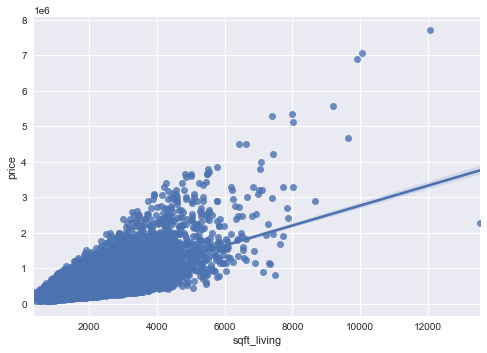

In [19]:
bc.sqft_living_vs_price(data)

###### Now, what about waterfront homes? Do they typically price higher?

<AxesSubplot:title={'center':'Waterfront or No Waterfront Property? Comparing Price Per Sqft Distribution'}, xlabel='Price per Square Foot', ylabel='Density'>

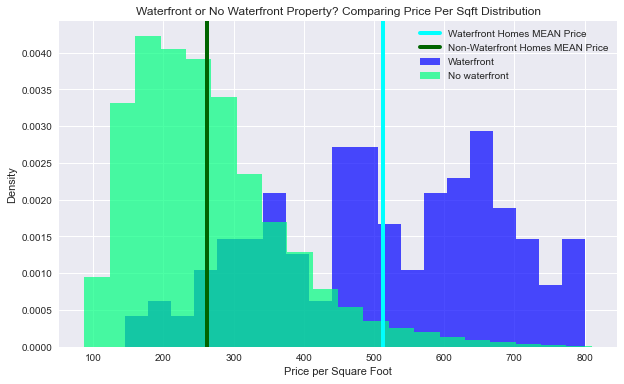

In [20]:
bc.waterfront_price_dist(data)

###### Let's also get a sense of the distribution of YEAR BUILT:

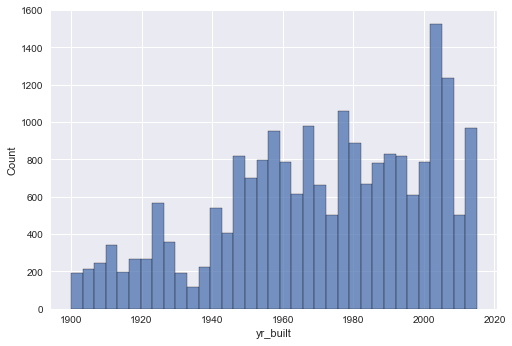

In [21]:
bc.yr_built_dist(data)

###### ...And Average Price per Sqft per Zipcode

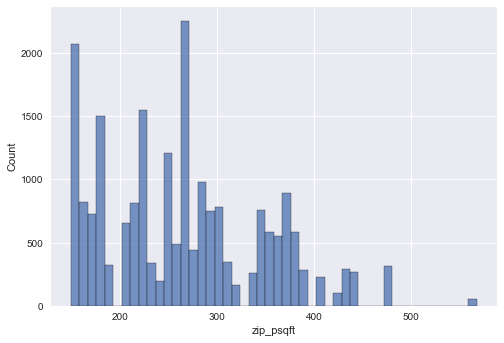

In [22]:
bc.zip_price_per_sqft_dist(data)

###### What about LOCATION? 

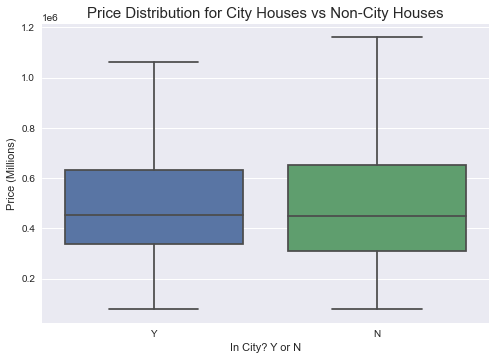

In [23]:
# In city vs Out of City Price Distributions
bc.in_city_boxplots(data)

These boxplots were surprising-- we were definitely expecting city homes to be priced higher on average.

When we looked at the King County Map (which is located at the bottom of this notebook), we wanted to see if incorporated homes (homes within a municipality) had less "bang for buck" than unincorporated homes.

Click [here](https://www.starnewsonline.com/article/NC/20151017/news/605047421/WM) to read an interesting article that expains the pros and cons of incorporated/unincorporated residencies.

<AxesSubplot:title={'center':'Comparing Average Price per Sqft: Unincorporated vs Incorporated Houses'}, ylabel='Average Price per Sqft'>

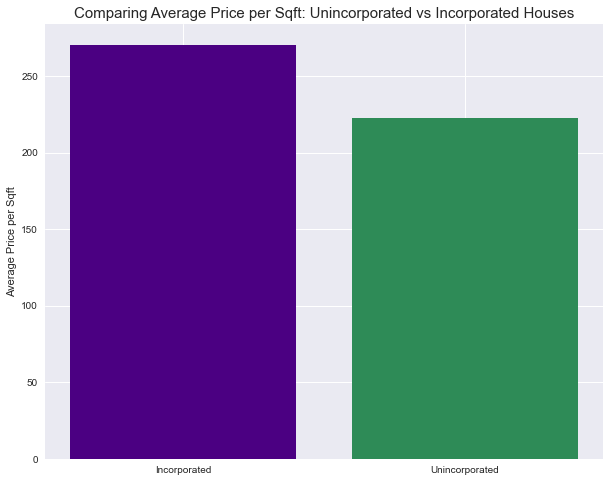

In [24]:
bc.incorp_vs_unincorp(data)

This bar graph highlights a pretty significance between the two. 

To see if the difference between the two was statistically significant, we performed **Welch's t-test**:

*Null Hypothesis: *
>$H_{0}$: The mean difference between incorporated and unincorporated price per sqft is zero. i.e. $\mu_{0} = \mu_{1}$

*Alternative Hypothesis*
>$H_{1}$ (1-tailed): The mean difference between incorporated and unincorporated price per sqft is **greater than** zero.

$\alpha$ = 0.05

First, we verified that the two distributions were relatively normal:

<AxesSubplot:title={'center':'Distribution of Price per Sqft: Incorporated vs Unincorporated Homes'}, xlabel='Price per Sqft', ylabel='Density'>

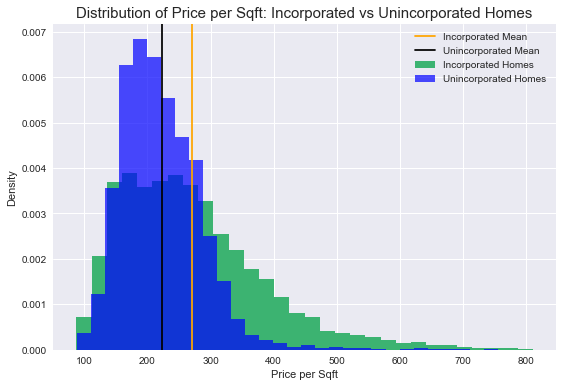

In [25]:
bc.ttest_dist_check(data)

There is a definite positive skew, but not enough to not be eligible for a t-test.

In [26]:
from scipy import stats

The variances of the two distributions are relatively similar:

In [27]:
data['price_per_sqft'][data['unincorporated']=='N'].describe()

count    18714.000000
mean       270.539063
std        114.013676
min         87.588235
25%        183.877554
50%        251.258393
75%        330.243325
max        810.138889
Name: price_per_sqft, dtype: float64

In [28]:
data['price_per_sqft'][data['unincorporated']=='Y'].describe()

count    2883.000000
mean      222.627922
std        65.395154
min        88.000000
25%       176.395939
50%       213.268608
75%       259.870130
max       754.716981
Name: price_per_sqft, dtype: float64

Let's get our p_value. Since `scipy.stats.ttest_ind()` only does a two-tailed test, we have to divide this value by 2.

In [29]:
alpha = 0.05

p_val = stats.ttest_ind(data['price_per_sqft'][data['unincorporated']=='N'], data['price_per_sqft'][data['unincorporated']=='Y']).pvalue / 2
p_val

1.6240521003735314e-106

In [30]:
p_val < alpha

True

*Given that the p_value is less than alpha, we can confirm that the mean price per sqft of Incorporated homes is not greater than the mean price per sqft of Unincorporated homes by chance*.

### Let's do some mappin'!

Click [here](https://www.kingcounty.gov/services/gis/GISData.aspx) to access the King County shapefile website.

In [31]:
import geopandas as gpd

Below is a cloropleth map depicting the Average Price per Square Foot for each zipcode (outlined in the map).

Main takeaway: the zipcodes with the **lowest price per sqft** are concentrated on the **south** half of the map.

<AxesSubplot:title={'center':'Price per Square Foot per Zipcode'}>

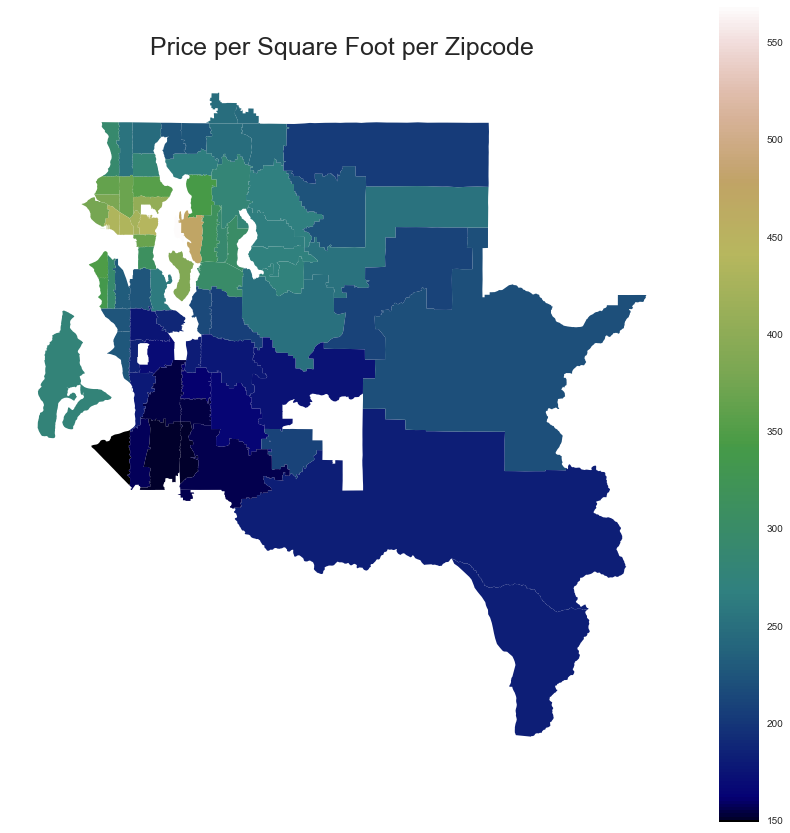

In [32]:
bc.cloropleth(data)

To see the map distribution of different qualities of houses, we layered on **grade** to the cloropleth map:

We found that there was a **higher concentration of higher quality houses on the northern half of the map**.

<AxesSubplot:title={'center':'Distribution of Homes Using the King County Grading System'}>

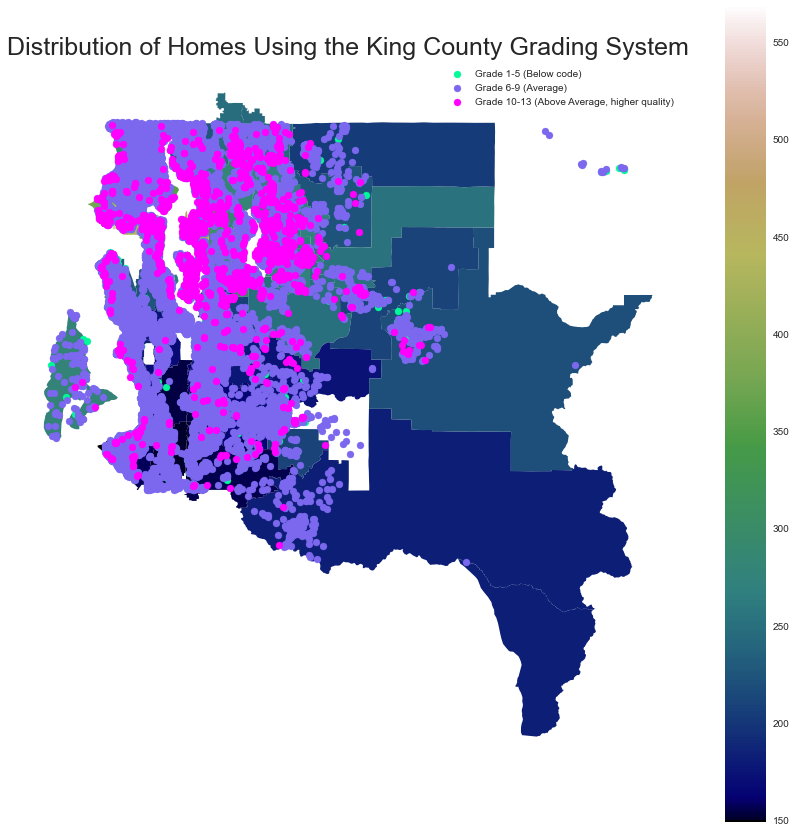

In [33]:
bc.map_grades(data)

Wanted to see if there was any notable patterns with **waterfront homes** in terms of house quality.

We found no patterns of note.

<AxesSubplot:title={'center':'Price per Square Foot per Zipcode'}>

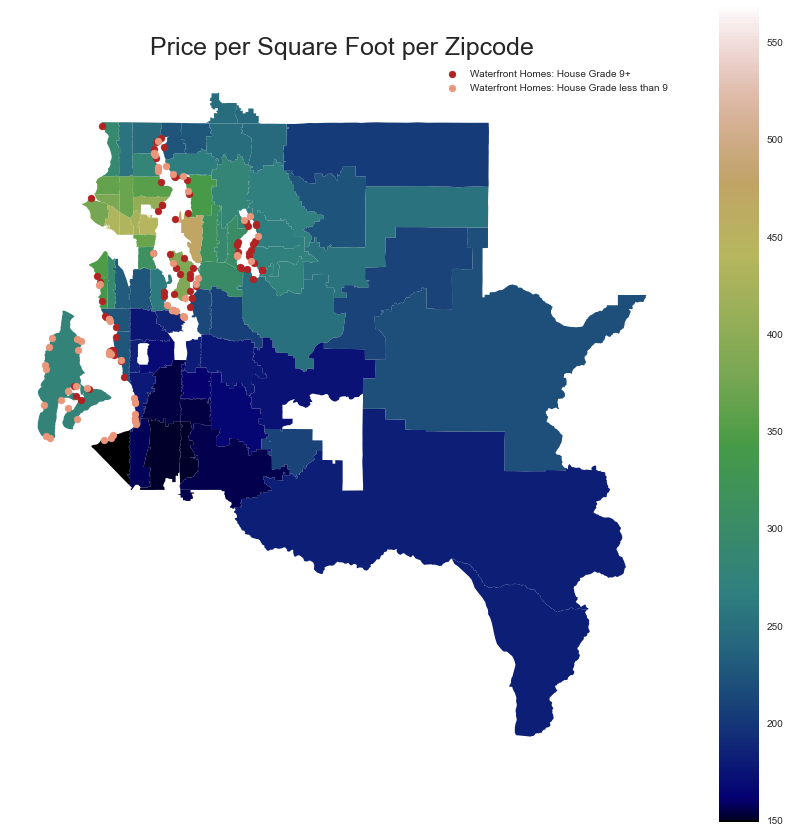

In [34]:
bc.map_waterfront(data)

Let's see how the patterns found in our analysis play out in our inferential model development.

## Data Prep (for Modeling)

Time to get some some dummies for our categorical variables:

In [35]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month_sold', 'year_sold', 'price_per_sqft', 'yard_size', 'in_city',
       'unincorporated', 'zip_psqft', 'location_cost', 'price_per_lot_sqft',
       'decade_built', '40yr_section', 'season_sold'],
      dtype='object')

In [36]:
from src import modeling_data_prep as mdp

In [37]:
model_data = mdp.add_dummies(data)
model_data.head() # scroll to the right to see the dummy variables

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,price_per_sqft,zip_psqft,price_per_lot_sqft,yard_size,...,decb_1940_1950,decb_1950_1960,decb_1960_1970,decb_1970_1980,decb_1980_1990,decb_1990_2000,decb_2000_2010,decb_2010_2020,fortyyr_1940_1980,fortyyr_1980_2020
0,221900.0,1180,5650,1180,1340,5650,188.050847,189.172528,39.274336,4470.0,...,0,1,0,0,0,0,0,0,0,0
1,538000.0,2570,7242,2170,1690,7639,209.338521,282.680191,74.288870,4672.0,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,770,10000,770,2720,8062,233.766234,225.145368,18.000000,9230.0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1050,1360,5000,308.163265,337.245108,120.800000,3040.0,...,0,0,1,0,0,0,0,0,0,0
4,510000.0,1680,8080,1680,1800,7503,303.571429,265.686627,63.118812,6400.0,...,0,0,0,0,1,0,0,0,0,0


Now that we have our `model_data`, we can start building our **first model**!

![skylinegraph](img/sklyinewithgraph.png)

## Model Iterations

In [38]:
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

###### For our model, we attempted to optimize the following features:
* minimizing p-values for each variable and condition number.
* maximizing F-statistic, Jarque-Bera probability, and R squared.

And, of course, making sure our model doesn't violate these assumptions:
* Normality
* Linearity
* Homoscedasticity

### Our *First Simple Model*

Since `sqft_living` has the **highest** correlation with price (0.702), let's build our first model around it!

In [39]:
formula = 'price ~ sqft_living'
fsm = ols(formula = formula, data = model_data).fit()
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:41:01   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

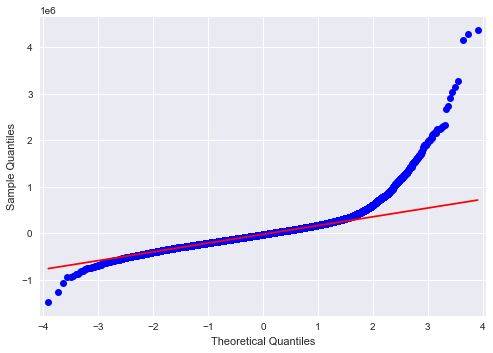

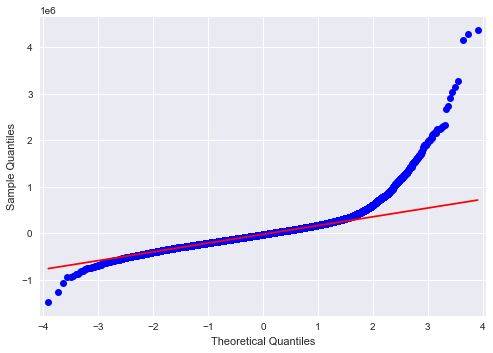

In [40]:
qqplot(fsm.resid, line='q')

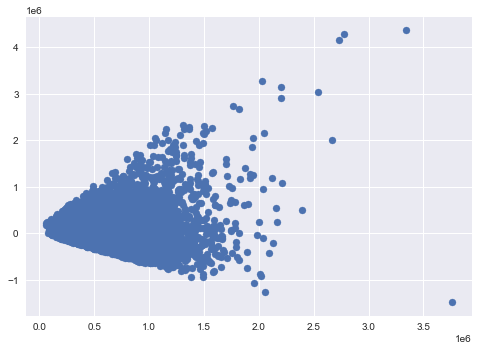

In [41]:
# Checking for homoscedasticity
x = fsm.predict(model_data['sqft_living'])
y = fsm.resid
plt.scatter(x, y)

#### First Simple Model Takeaways:

* low R-squared
* low p-value for `sqft_living`
* **HIGH** condition number (5630)
* QQ-plot - extreme **positive** deviation from the line in the 2nd through 4th quantiles
    * This confirms that our data is not normally distributed, which violates an assumption of linear regression.
    * Our data has a significant **right skew**
* The low Jarque-Bera probability (0.0) is additional confirmation for the lack of normality in error distribution.
* Our scatterplot shows **heteroscedasticity** with a right-facing, conical distribution of residuals.

### Model 2: Time to normalize

Upon examination of the results of our first model, let's take a look at our variables and see how we should adjust them for our second model.

###### Distribution of `sqft_living`

In [44]:
continuous_vars = ['sqft_living', 'sqft_lot', 
                   'sqft_living15', 'sqft_lot15', 'yard_size']

array([[<AxesSubplot:title={'center':'sqft_living Distribution'}>,
        <AxesSubplot:title={'center':'sqft_lot Distribution'}>,
        <AxesSubplot:title={'center':'sqft_living15 Distribution'}>],
       [<AxesSubplot:title={'center':'sqft_lot15 Distribution'}>,
        <AxesSubplot:title={'center':'yard_size Distribution'}>,
        <AxesSubplot:>]], dtype=object)

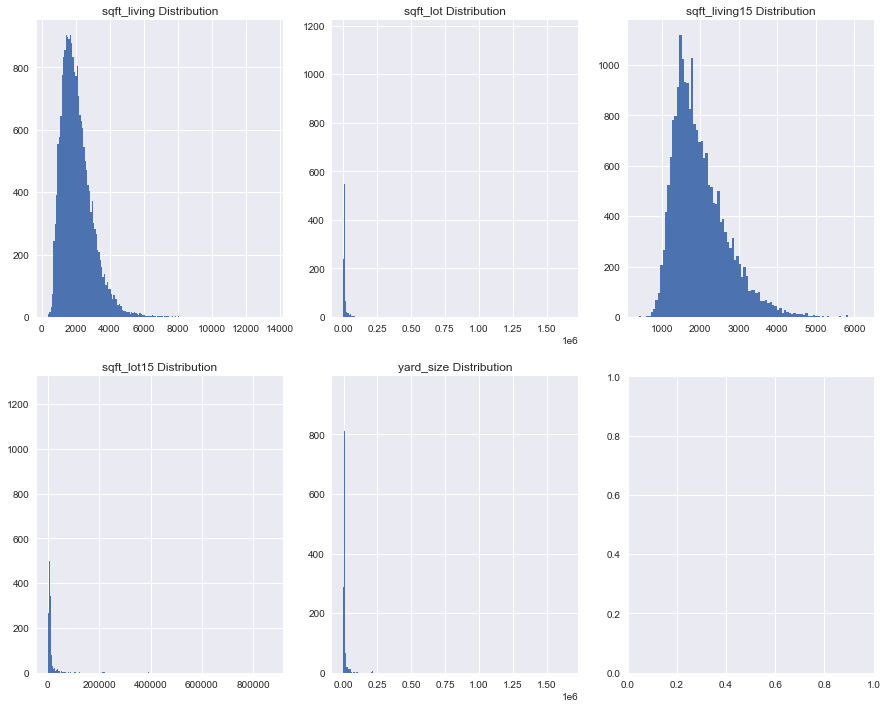

In [45]:
mdp.continuous_dists(model_data, continuous_vars)

Though it is a bit difficult to see in some of the graphs, each of these variables (including price) have a **positive skew**. Let's normalize all of these variables:

## FINAL Model

Drum roll, please...

## Conclusions

## Next Steps

## Sources

* [How Data Science is transforming real estate](https://www.realestate.bnpparibas.com/how-data-science-transforming-real-estate)
* [5 Ways to Apply Data Science to Real Estate](https://towardsdatascience.com/5-ways-to-apply-data-science-to-real-estate-e18cdcd0c1a6)
* [Here's what the 2021 housing market will look like in Seattle](https://www.seattlepi.com/realestate/article/seattle-2021-housing-market-projection-15825083.php)


* King County Map: (incorporated areas are colored)
    * Here's a nice [article](https://www.starnewsonline.com/article/NC/20151017/news/605047421/WM) about the difference between incorporated and unincorporated areas.



![KCmap](img/KingCountyMap.png)